<img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/>
<center><h1>Economics Advances and Happiness Ranking</h1></center>
<hr>
<center><h2> This report analyzes the correlation between Economic Freedom Index and Happiness Ranking</h2></center>
<hr>

### Author(s)

- Peh Wen Hao (@Wenhao)

- Zong Yang (@zzzongyang)

- Ang Kheng (@AngKheng)

Class: Hackwagon 102 Saturday 3.45pm 

### Executive Summary
This report analyzes the relationship between `Happiness Index` and factors including but not limited to: `freedom`, `economic development` and `other factors` using 2 data sets involving happiness and economic data of 186 countries. Our investigation aims to aid understanding on why societal happiness varies across countries (e.g. Money = Happiness) and challenge the hypothesis of happiness being based solely on internal factors (e.g. Positive thoughts = Happiness).


In this investigation, we studied the possible impact on happiness of the following factors:

1) freedom indicators

2) government's actions and behaviours  

3) other possible variables that are highly correlated with happiness  


We hypothesise that these factors will have a definitive impact on happiness and we will attempt to prove/disprove it through the use of Python visualisation tools such as graphical plots, heat maps and regression models.

### Problem Statement/ Limitation

This report provides an analysis based on `129 out of 195 Countries in the world`. (Refer to `df_analysis)` A portion of the data is not collected due to multiple reasons. Thus, to provide an accurate analysis, we will `remove countries with partial information` of it's index or ranking.

`Happiness is based on other influencing factors` and will not be solely based on Economic Index (External Factor). Although `Economic Index` is one of the `influencing factor` to determine the happiness of people in the country, this report `DOES NOT fully represent`  how humans determine `happiness`. 

If the `individual variables` highly correlate with Happiness, it `does not necessarily mean that the variables will still be highly correlated to Happiness` when `other variables are introduced` into the model.

The `dataset` used for the analysis is quite `small`. Hence, to provide a more `accurate relationship between happiness and the variables`, data throughout the years can be aggregated for each variable. This results in better models created and not just rely on the dataset for one year.

`Time series analysis` can be done for a `particular variable` for a selected country and visualisations can be created to show how the variable changes as the country progresses over the years.


### Research Topic & Hypothesis
In this report, we aim to study the correlation between the variables affecting Economic Freedom Index, and Happiness ranking.

Our `prior beliefs factors` such as a "good government means happiness among citizens", "higher gdp results in happier people", and "when people have the freedom of choice in various aspects, it means that they will be happier" will be assessed in this report.


**Literature / Articles (where necessary):**
- Article 1 (https://ourworld.unu.edu/en/does-economic-growth-make-us-happy) retrieved on 12 June 2019
- Article 2 (https://hbr.org/2016/04/when-economic-growth-doesnt-make-countries-happier) retrieved on 12 June 2019
- Article 3 (https://www.miuc.org/higher-gdp-per-capita-more-happiness/) retrieved on 12 June 2019
- Article 4 (https://www.psychologicalscience.org/observer/serious-research-on-happiness) retrieved on 12 June 2019
- Paper 1
(https://www.researchgate.net/publication/323400926_The_Relationship_between_Happiness_and_Economic_Development_in_KSA_Study_of_Jazan_Region) retrieved on 12 June 2019

**Datasets used:**
- Source 1 (https://www.kaggle.com/lewisduncan93/the-economic-freedom-index) retrieved on 20 May 2019
- Source 2 (https://www.kaggle.com/unsdsn/world-happiness) retrieved on 20 May 2019


**Structure of Datasets used:**
- Economic Freedom Index 2019.csv files
- World Happiness Index 2019.csv files

### Step 1: Import Library

In [1]:
# import the relevant packages
from scipy.interpolate import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Set matplotlib inline
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Step 2: Import and Preview Datasets

In [2]:
# import data frame
# read_csv('file', encoding = "ISO-8859-1") alternatively encoding = "utf-8"
economic_df = pd.read_csv('Economic Freedom Index 2019.csv', encoding = "ISO-8859-1")
# print the first 5 rows
display(economic_df[0:3])

# import data frame
# read_csv('file', encoding = "ISO-8859-1") alternatively encoding = "utf-8"
happiness_df = pd.read_csv('World Happiness Index 2019.csv', encoding = "ISO-8859-1")
# print the first 5 rows
display(happiness_df[:3])

,CountryID,CountryName,WEBNAME,Region,WorldRank,RegionRank,2019Score,`,JudicalEffectiveness,GovernmentIntegrity,...,Country,PopulationMillions,"GDPBillions,PPP",GDPGrowthRate,5YearGDPGrowthRate,GDPperCapitaPPP,Unemployment,Inflation,FDIInflowMillions,PublicDebtofGDP
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,69.60,2.5,2.9,1958,8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,36.00,3.9,2.5,12507,13.9,2.0,1119.1,71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,632.90,2.0,3.1,15237,10,5.6,1203.0,25.8


,Countryregion,Ladder,SDofLadder,Positiveaffect,Negativeaffect,Socialsupport,Freedom,Corruption,Generosity,LogofGDP percapita,Healthylife expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0


### Step 3: Data Cleaning: Finding common countries across both data sets

Our objectives in the data cleaning is to:
- Finding the common countries in both data set
- Filter data set to obtain only information on the common countries  

### REMOVE data that contain NaN

In [3]:
print(economic_df.shape)
print(happiness_df.shape)
economic_df.dropna(inplace=True, axis=0)
happiness_df.dropna(inplace=True, axis=0)
print(economic_df.shape)
print(happiness_df.shape)

(186, 34)
(156, 11)
(173, 34)
(140, 11)


### REMOVE Black Spaces and Lowercase the column header

In [4]:
economic_df.columns = economic_df.columns.str.lower().str.replace(' ', '') 
economic_df.head(1)

,countryid,countryname,webname,region,worldrank,regionrank,2019score,`,judicaleffectiveness,governmentintegrity,...,country,populationmillions,"gdpbillions,ppp",gdpgrowthrate,5yeargdpgrowthrate,gdppercapitappp,unemployment,inflation,fdiinflowmillions,publicdebtofgdp
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,69.60,2.5,2.9,1958,8.8,5.0,53.9,7.3


### RENAME: Column 'Ladder' ranking to 'happiness' ranking

In [5]:
happiness_df.columns = happiness_df.columns.str.lower().str.replace(' ', '').str.replace('ladder', 'happiness') 
happiness_df.head(1)

# Alternatively:
# df_analysis.columns = ['countryname', 'worldrank', 'judicaleffectiveness',
#        'governmentintegrity', 'businessfreedom', 'laborfreedom',
#        'monetaryfreedom', 'tradefreedom', 'investmentfreedom',
#        'financialfreedom', 'gdpgrowthrate', '5yeargdpgrowthrate',
#        'gdppercapitappp', 'inflation', 'happiness', 'sdofhappiness', 'freedom',
#        'corruption', 'generosity', 'socialsupport', 'logofgdp\npercapita',
#        'healthylife\nexpectancy']

,countryregion,happiness,sdofhappiness,positiveaffect,negativeaffect,socialsupport,freedom,corruption,generosity,logofgdp percapita,healthylife expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0


### MERGE Economic and Happiness Dataset

In [6]:
# display(freedom_df.head(), happiness_df.head())
countries_economic_df = []
countries_happiness_df = []
for country in economic_df['countryname']:
    countries_economic_df.append(country)
for country in happiness_df['countryregion']:
    countries_happiness_df.append(country)
# print(countries_freedom_df, countries_happiness_df)

In [7]:
# Find the common countries across both datasets
# Uncomment to see the list of common countries
common_countries = []
for i in countries_economic_df:
    if i in countries_happiness_df:
        common_countries.append(i)
for i in countries_happiness_df:
    if i in countries_economic_df:
        common_countries.append(i)
common_countries = set(common_countries)
# print(common_countries)
# print(len(common_countries), len(countries_freedom_df), len(countries_happiness_df))

In [8]:
common_economic_df = pd.DataFrame()
common_happiness_df = pd.DataFrame()
common_df = pd.DataFrame()

economic_df_copy = economic_df.copy()
happiness_df_copy = happiness_df.copy()
common_economic_df = economic_df_copy[economic_df_copy['countryname'].isin(common_countries)]
common_happiness_df = happiness_df_copy[happiness_df_copy['countryregion'].isin(common_countries)]
common_happiness_df = common_happiness_df.rename(columns={"countryregion": "countryname"})
# display(common_freedom_df.head())
# display(common_happiness_df.head())

common_df = common_economic_df.merge(common_happiness_df, on='countryname')
common_df.head()

,countryid,countryname,webname,region,worldrank,regionrank,2019score,`,judicaleffectiveness,governmentintegrity,...,happiness,sdofhappiness,positiveaffect,negativeaffect,socialsupport,freedom,corruption,generosity,logofgdp percapita,healthylife expectancy
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,107,126,90.0,108.0,133.0,87.0,134.0,60.0,81.0,40.0
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,88,56,113.0,106.0,101.0,149.0,46.0,128.0,72.0,78.0
3,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,47,97,28.0,93.0,46.0,54.0,109.0,123.0,55.0,37.0
4,6,Armenia,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,...,116,82,126.0,145.0,117.0,123.0,93.0,129.0,91.0,64.0


In [9]:
common_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 128
Data columns (total 44 columns):
countryid                 129 non-null int64
countryname               129 non-null object
webname                   129 non-null object
region                    129 non-null object
worldrank                 129 non-null float64
regionrank                129 non-null float64
2019score                 129 non-null float64
`                         129 non-null float64
judicaleffectiveness      129 non-null float64
governmentintegrity       129 non-null float64
taxburden                 129 non-null float64
govtspending              129 non-null float64
fiscalhealth              129 non-null float64
businessfreedom           129 non-null float64
laborfreedom              129 non-null float64
monetaryfreedom           129 non-null float64
tradefreedom              129 non-null float64
investmentfreedom         129 non-null float64
financialfreedom          129 non-null float64
tariffr

### FILTER irrevent dataset and SELECT relevent dataset for analysis 

In [10]:
df_analysis = common_df[[
    'countryname','worldrank','judicaleffectiveness','governmentintegrity',
    'businessfreedom', 'laborfreedom', 'monetaryfreedom', 'tradefreedom' ,'investmentfreedom', 'financialfreedom',
    'gdpgrowthrate','5yeargdpgrowthrate', 'gdppercapitappp', 'inflation', 
    'happiness', 'sdofhappiness', 'freedom', 'corruption', 'generosity',
    'socialsupport', 'logofgdp\npercapita','healthylife\nexpectancy']] 
df_analysis.head()

,countryname,worldrank,judicaleffectiveness,governmentintegrity,businessfreedom,laborfreedom,monetaryfreedom,tradefreedom,investmentfreedom,financialfreedom,...,gdppercapitappp,inflation,happiness,sdofhappiness,freedom,corruption,generosity,socialsupport,logofgdp percapita,healthylife expectancy
0,Afghanistan,152.0,29.6,25.2,49.2,60.4,76.7,66.0,10.0,10.0,...,1958,5.0,154,25,155.0,136.0,137.0,151.0,134.0,139.0
1,Albania,52.0,30.6,40.4,69.3,52.7,81.5,87.8,70.0,70.0,...,12507,2.0,107,126,87.0,134.0,60.0,133.0,81.0,40.0
2,Algeria,171.0,36.2,28.9,61.6,49.9,74.9,67.4,30.0,30.0,...,15237,5.6,88,56,149.0,46.0,128.0,101.0,72.0,78.0
3,Argentina,148.0,44.5,33.5,56.4,46.9,60.2,70.0,55.0,60.0,...,20876,25.7,47,97,54.0,109.0,123.0,46.0,55.0,37.0
4,Armenia,47.0,46.3,38.6,78.3,71.4,77.8,80.8,75.0,70.0,...,9456,0.9,116,82,123.0,93.0,129.0,117.0,91.0,64.0


In [11]:
df_analysis.shape

(129, 22)

In [12]:
df_analysis.columns

Index(['countryname', 'worldrank', 'judicaleffectiveness',
       'governmentintegrity', 'businessfreedom', 'laborfreedom',
       'monetaryfreedom', 'tradefreedom', 'investmentfreedom',
       'financialfreedom', 'gdpgrowthrate', '5yeargdpgrowthrate',
       'gdppercapitappp', 'inflation', 'happiness', 'sdofhappiness', 'freedom',
       'corruption', 'generosity', 'socialsupport', 'logofgdp\npercapita',
       'healthylife\nexpectancy'],
      dtype='object')

In [13]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 128
Data columns (total 22 columns):
countryname               129 non-null object
worldrank                 129 non-null float64
judicaleffectiveness      129 non-null float64
governmentintegrity       129 non-null float64
businessfreedom           129 non-null float64
laborfreedom              129 non-null float64
monetaryfreedom           129 non-null float64
tradefreedom              129 non-null float64
investmentfreedom         129 non-null float64
financialfreedom          129 non-null float64
gdpgrowthrate             129 non-null float64
5yeargdpgrowthrate        129 non-null float64
gdppercapitappp           129 non-null object
inflation                 129 non-null float64
happiness                 129 non-null int64
sdofhappiness             129 non-null int64
freedom                   129 non-null float64
corruption                129 non-null float64
generosity                129 non-null float64
socialsu

### Step 4: Visualize, Insights and Evaluation 

- Insight 1 - `Freedom Indicators` (The Impact of Freedom correlate to Happiness)
- Insight 2 - `Government's actions and behaviours` (The impact of Government Corruption, Effectiveness and Integrity correlates to Happiness.)
- Insight 3 - `GDP and other possible variables that are highly correlated to happiness` (The impact of Healthylife expectancy, LogofGDP per capita, and Social support correlate to Happiness.)

### INSIGHT 1: The Impact of Freedom correlate to Happiness
- What is the impact of freedom on happiness? A research study concluded that freedom does not result in any happiness returns (Abdur Rahman, A. & Veenhoven, R. Applied Research Quality Life (2018) 13: 435. https://doi.org/10.1007/s11482-017-9543-6). However, the role of freedom continues to be highly valued by many. That's completely reasonable if one thinks about having all his freedom taken away from him, life in a prison is definitely not ideal. On the other hand, freedom cannot guarantee happiness. 


- In this chapter, we will cast aside all biases, study the data we have at hand and decide if we are able to conclude the relationship between freedom and happiness. 


- Also, we will consider the six freedom indicators: business freedom, labor freedom, monetary freedom, trade freedom, investment freedom and financial freedom on the happiness ranking.

### CREATE Dataframe for `freedomimpact_df` **for analysis.**

In [14]:
freedomimpact_df = df_analysis[['countryname', 'businessfreedom', 'laborfreedom', 'monetaryfreedom', 
                                            'tradefreedom' ,'investmentfreedom', 'financialfreedom', 'happiness']]
# freedomimpact_df['totalfreedom'] = [freedomimpact_df['businessfreedom'] + freedomimpact_df['laborfreedom'] 
#                                     + freedomimpact_df['monetaryfreedom'] + freedomimpact_df['tradefreedom']
#                                     + freedomimpact_df['investmentfreedom'] + freedomimpact_df['financialfreedom']
#                                    ]

freedomimpact_df['totalfreedom'] = freedomimpact_df.apply(lambda row: row.businessfreedom + row.laborfreedom 
                                                          + row.monetaryfreedom + row.tradefreedom 
                                                          + row.investmentfreedom + row.financialfreedom, axis=1)

freedomimpact_df.head(3)

C:\Users\Kayva\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,countryname,businessfreedom,laborfreedom,monetaryfreedom,tradefreedom,investmentfreedom,financialfreedom,happiness,totalfreedom
0,Afghanistan,49.2,60.4,76.7,66.0,10.0,10.0,154,272.3
1,Albania,69.3,52.7,81.5,87.8,70.0,70.0,107,431.3
2,Algeria,61.6,49.9,74.9,67.4,30.0,30.0,88,313.8


**Next, let's plot a scatterplot to see if we can find any patterns between total freedom and happiness.**

### RUN an OLS Regression

Use the results of `sm.OLS()` to find the coefficients of the best fit line in the scatter plot example.

### CREATE $\textbf{X}$ and $\textbf{y}$, the input variables and target variable

Declare 2 variables, `X` to represent $\textbf{X}$ the input variable and `y` to represent $\textbf{y}$ the target variable. (Note that both $\textbf{X}$ and $\textbf{y}$ are bold to show they are a matrix and vector respectively.)


Note: `X` must be a `DataFrame` and `y` must be a `Series`.

In [15]:
# Declare X and y
#
X = freedomimpact_df[['happiness']]
y = freedomimpact_df['totalfreedom']

# print(X,y)

### TRAINING the model

We will use `model = sm.OLS(y, X)` to instantiate the model. Then, we use `results = model.fit()` to train the model using the training set.

In [16]:
# Create the Model
#
model = sm.OLS(y,X)

freedomimpact_df['fitted_freedom'] = model.fit().fittedvalues

# predictions =  model.fit().predict(X)

freedomimpact_df.head()

C:\Users\Kayva\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,countryname,businessfreedom,laborfreedom,monetaryfreedom,tradefreedom,investmentfreedom,financialfreedom,happiness,totalfreedom,fitted_freedom
0,Afghanistan,49.2,60.4,76.7,66.0,10.0,10.0,154,272.3,536.236473
1,Albania,69.3,52.7,81.5,87.8,70.0,70.0,107,431.3,372.579887
2,Algeria,61.6,49.9,74.9,67.4,30.0,30.0,88,313.8,306.420842
3,Argentina,56.4,46.9,60.2,70.0,55.0,60.0,47,348.5,163.656586
4,Armenia,78.3,71.4,77.8,80.8,75.0,70.0,116,453.3,403.918382


### PLOTTING the fitted line USING the Model
​
We now attempt to plot the fitted line for the training set. Use `results.fittedvalues` to get the predicted `total freedom` for all `happiness` in the training set.

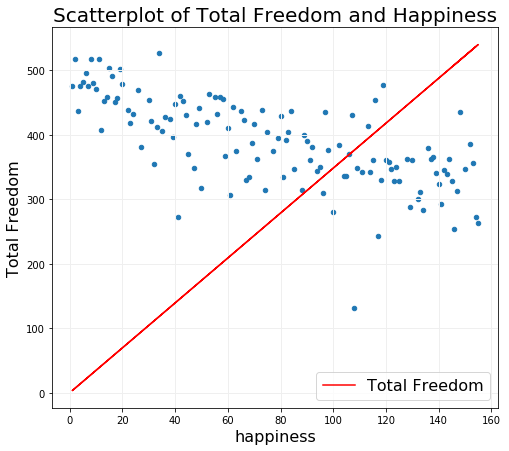

In [17]:
fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111)

freedomimpact_df.plot(kind='scatter', x='happiness', y='totalfreedom',ax=ax1)
freedomimpact_df.plot(kind='line', x='happiness', y='fitted_freedom', ax=ax1, color='red')
plt.title("Scatterplot of Total Freedom and Happiness", fontsize=20)
ax1.grid(color='#efefef', linewidth=1)
ax1.legend(['Total Freedom'], fontsize=16)
ax1.set_ylabel("Total Freedom", fontsize=16)
ax1.set_xlabel("happiness", fontsize=16)
plt.show()

### INSIGHT  1: Visualization

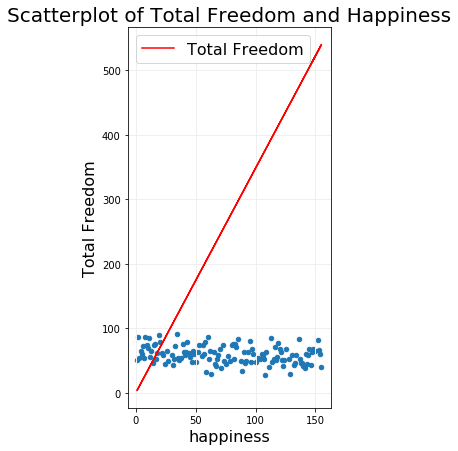

In [18]:
fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(121)

freedomimpact_df.plot(kind='scatter', x='happiness', y='laborfreedom',ax=ax1)
freedomimpact_df.plot(kind='line', x='happiness', y='fitted_freedom', ax=ax1, color='red')
plt.title("Scatterplot of Total Freedom and Happiness", fontsize=20)
ax1.grid(color='#efefef', linewidth=1)
ax1.legend(['Total Freedom'], fontsize=16)
ax1.set_ylabel("Total Freedom", fontsize=16)
ax1.set_xlabel("happiness", fontsize=16)
plt.show()


In [19]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           totalfreedom   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     207.1
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           1.60e-28
Time:                        23:33:14   Log-Likelihood:                -892.46
No. Observations:                 129   AIC:                             1787.
Df Residuals:                     128   BIC:                             1790.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
happiness      3.4821      0.242     14.390      0.000       3.003       3.961
==============================================================================
Omnibus:                       32.821   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.736
Skew:                           0.045   Prob(JB):                       0.0345
Kurtosis:                       1.884   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INSIGHT 1: Limitation
From the results summary, the R-squared values of 0.618 shows that it is not a good fit. Therefore, there isn't a relationship between total freedom and happiness.

One might argue that while total freedom might not result in a good fit, the individual freedom indicators might be. In the following, we will attempt to see if that's the case.

#### Let's take a look at labour freedom:

In [20]:
# Declare X and y
#
X = freedomimpact_df[['happiness']]
y = freedomimpact_df['laborfreedom']

# print(X,y)
# Create the Model
#
model = sm.OLS(y,X)
freedomimpact_df['fitted_freedom'] = model.fit().fittedvalues

# predictions =  model.fit().predict(X)
freedomimpact_df.head()
result = model.fit()
result.summary() 


C:\Users\Kayva\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           laborfreedom   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           1.86e-31
Time:                        23:33:14   Log-Likelihood:                -644.01
No. Observations:                 129   AIC:                             1290.
Df Residuals:                     128   BIC:                             1293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
happiness      0.5511      0.035     15.627      0.000       0.481       0.621
==============================================================================
Omnibus:                       11.924   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.360
Skew:                           0.086   Prob(JB):                        0.113
Kurtosis:                       2.116   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INSIGHT 1: Findings
The R-squared value for the plot of labour freedom vs happiness is 0.656 which doesn't show a good fit. 
Similarly, the same is done for the other indicator and all of it doesn't result in a high R-squared value.
Therefore, we may conclude that freedom is not a good predictor of happiness levels.  

### INSIGHT 2: The impact of Government Corruption, Effectiveness and Integrity correlates to Happiness.
Country with high happiness index tend to be a richer country (E.g. Lower Corruption, Crime rate, higher Government integrity and effectiveness.) The question is if a country with the highest corruption index, highest inflation rate, Low government effectiveness and integrity be ranked lowest in the Happiness Index? Let's find out.

In [21]:
happiness_df = df_analysis[['countryname','happiness']]
happiness_df = happiness_df[
    ((happiness_df['happiness'] < 11))]
happiness_df['countryname']

6          Austria
21          Canada
31         Denmark
38         Finland
51         Iceland
85     Netherlands
86     New Zealand
90          Norway
110         Sweden
111    Switzerland
Name: countryname, dtype: object

### Unhappy In Venezuala?

Which Country has the highest inflation rate (Hyperinflation)?
In economics, `hyperinflation` is very high and typically accelerating inflation. It quickly erodes the real value of the local currency, as the prices of all goods increase.

`Argentina,Azerbaijan, Burundi, Egypt, Ghana, Haiti, Liberia, Libya, Mozambique, Nigeria, Sierra Leone, Ukraine, Uzbekistan and Venezuela` have an inflation rate more than 11.9%. In the chart below, Venezuala has the highest inflation rate at
1087.5%. How can the people live in this country be happy? (Just Imaging your Chicken rice cost 3 dollars today and 3 thousand dollars next year). `Venezuala` MUST be the country with most UNHAPPY citizen! True? Let's find out. 

The lower bound is -4.9
The upper bound is 11.9


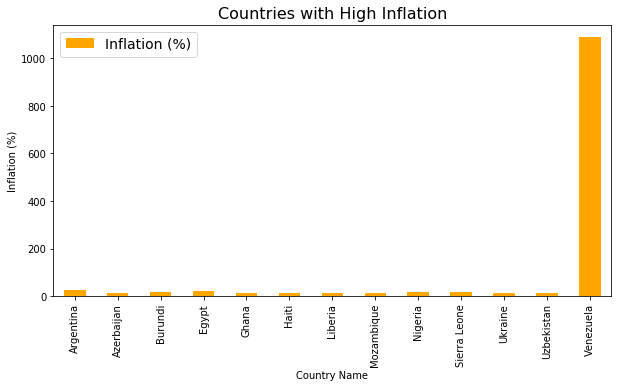

In [22]:
#find the country with the hyperinflation
hyperinflation_df = df_analysis[df_analysis['inflation'] == df_analysis['inflation'].max()]
# print(hyperinflation_df['countryname'], hyperinflation_df['inflation(%)'])
# print()

inflation_df = df_analysis[['countryname','inflation']]

p25 = np.percentile(inflation_df['inflation'], 25)
p75 = np.percentile(inflation_df['inflation'], 75)
iqr = p75 - p25
lower_bound = (p25 - 1.5*iqr).round(4)
upper_bound = (p75 + 1.5*iqr).round(4)
print("The lower bound is " + str(lower_bound))
print("The upper bound is " + str(upper_bound))

high_inflation = inflation_df.copy()
high_inflation = high_inflation[(high_inflation['inflation'] >= upper_bound)]
fig, ax1 = plt.subplots()
ax1.set_title("Countries with High Inflation", fontsize=16) 
high_inflation.plot(kind='bar',x='countryname', y='inflation', ax=ax1, figsize=(10,5), color='#ffa600')
ax1.set_xlabel('Country Name')
ax1.set_ylabel('Inflation (%)')
ax1.legend(['Inflation (%)'], fontsize=14)

plt.show()

### Oh no, Its Central African Republic! Being last at #155 in the Happiness Ranking

In [23]:
happiness_df = df_analysis[df_analysis['happiness'] == df_analysis['happiness'].max()]
print(happiness_df['countryname'], happiness_df['happiness'])


22    Central African Republic
Name: countryname, dtype: object 22    155
Name: happiness, dtype: int64


### Venezuela have a ranking of #108 in the Happiness Ranking

In [24]:
vene_df = df_analysis[df_analysis['countryname']=='Venezuela']
print(vene_df['countryname'], vene_df['happiness'])


125    Venezuela
Name: countryname, dtype: object 125    108
Name: happiness, dtype: int64


### Low Corruption = High Happiness Ranking?

Comparing (High Happiness Ranking, High Corruption) countries like `Italy, Panama and Czach Republic`, although the Corruption Index in the Country is relatively High but their happiness ranking is higher or equivalent to that of `Singapore`.

Identifying (Low Happiness Ranking, Low Corruption), although `Rawanda` has one of the least corrupted government but Rawanda Scores low in its happiness index ranking. 

Comparing the (`Corruption to Happiness`) results for overall, countries with the least corrupted government tend to have happier people. Happiness ranking and Corruption is corelated to a certain extend as there are other factors that influence the Happiness ranking instead of the government. (`E.g. Quality of Life, Standard of Living`). Ultimately, Happiness ranking is influence by many factors and country `level of corruption is one of the determining factor`.

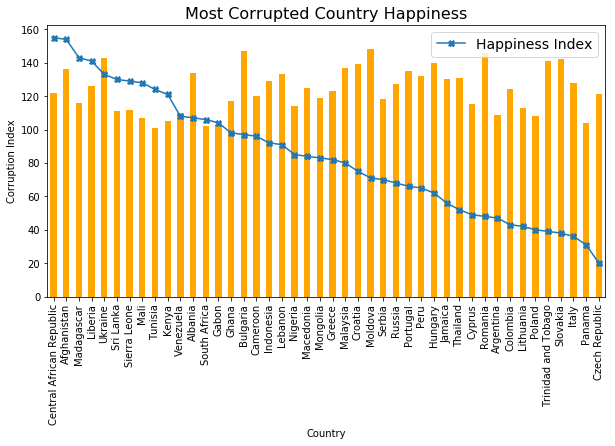

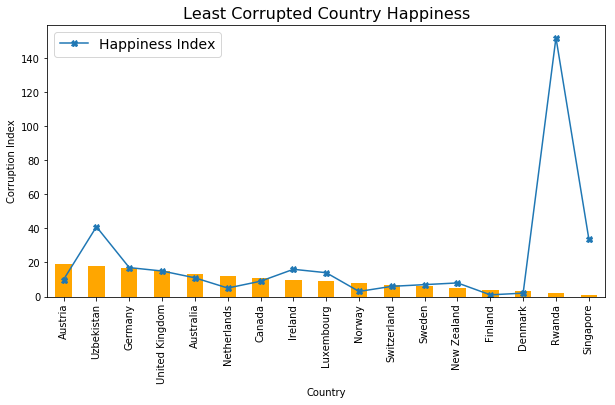

In [25]:
# Corruption to Happiness
corruption_happiness = df_analysis[['countryname','corruption','happiness']]
corruption_happiness = corruption_happiness[
    ((corruption_happiness['corruption'] >100))]
corruption_happiness.sort_values('happiness', ascending=False, inplace=True)

plt.figure(figsize=(20, 20))
ax = plt.subplot(111)
ax.set_title("Most Corrupted Country Happiness", fontsize=16) 
corruption_happiness.plot(kind='bar',x='countryname', y='corruption', ax=ax, figsize=(10,5), color='#ffa600')
corruption_happiness.plot(kind='Line', x='countryname',y='happiness', ax=ax, marker="X")
plt.xticks(rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Corruption Index')
ax.legend(['Happiness Index'], fontsize=14)
plt.show()

# Corruption to Happiness
corruption_happiness = df_analysis[['countryname','corruption','happiness']]
corruption_happiness = corruption_happiness[
    ((corruption_happiness['corruption'] <20))]
corruption_happiness.sort_values('corruption', ascending=False, inplace=True)

plt.figure(figsize=(20, 20))
ax1 = plt.subplot(111)
ax1.set_title("Least Corrupted Country Happiness", fontsize=16) 
ax1 = corruption_happiness.plot(kind='bar',x='countryname', y='corruption', ax=ax1, figsize=(10,5), color='#ffa600')
ax1 = corruption_happiness.plot(kind='Line', x='countryname',y='happiness', ax=ax1, marker="X")
plt.xticks(rotation=90)
ax1.set_xlabel('Country')
ax1.set_ylabel('Corruption Index')
ax1.legend(['Happiness Index'], fontsize=14)
plt.show()

### Effective Administration = High Happiness Ranking?
Definition: Judicial Effectiveness is the `effectiveness and fairness of judicial systems`. Citizens expect court decisions to be implemented in an effective and fair manner. Well-functioning civil justice systems protect the rights of all citizens against infringement of the law by others, including by powerful parties and governments.
(https://www.oecd-ilibrary.org/governance/government-at-a-glance-2015/effectiveness-and-fairness-of-judicial-systems_gov_glance-2015-65-en) retrieved on 16 June 2019

Definition: Government integrity is a crucial determinant of trust. ... Integrity policies, aimed at `preventing corruption `and fostering high standards of behaviour, help to reinforce the credibility and legitimacy of those involved in policy decision making, safeguarding the public interest and restoring confidence in the policy making process.
(http://www.oecd.org/gov/trust-integrity-and-fairness.htm) retrieved on 16 June 2019

From the chart above, country with `low happiness ranking` tend to have `low level of Government Integrity and Judical Effectiveness` at an `index ranging from 0 - 40`. Country with `high happiness ranking` tend to have `high level of Government Integrity and Judical Effectiveness` at an `index range of 60 - 100`. With an `exception case for Japan` which has a happiness ranking of < 60. This can be treated as an outlier or be `further investigated` for the reason behind the finding. 

With this, we recognize that country with `high government integrity and judical effectiveness tend to have a high happiness ranking` compared to countries with low government integrity and judical effectiveness. 

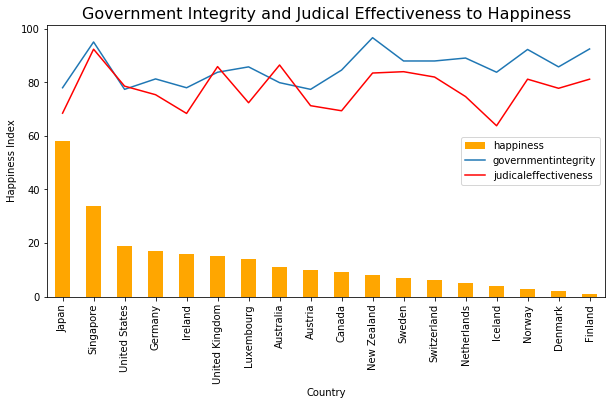

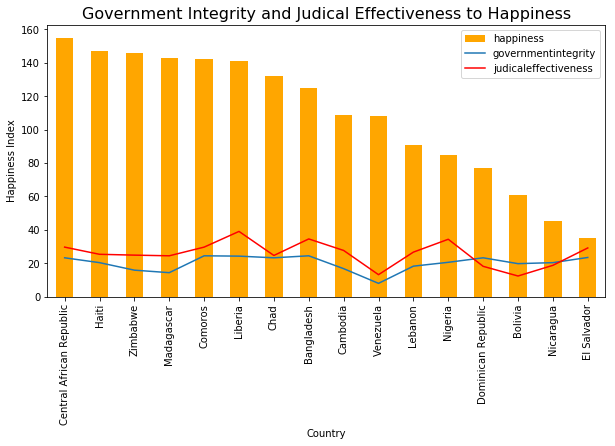

In [26]:
# Government Integrity to Happiness
integrity_happiness = df_analysis[['countryname','governmentintegrity','corruption','judicaleffectiveness','happiness']]
integrity_happiness = integrity_happiness[
    ((integrity_happiness['governmentintegrity'] > 75))]
integrity_happiness.sort_values('governmentintegrity', ascending=False, inplace=True)
integrity_happiness.sort_values('happiness', ascending=False, inplace=True)

ax2 = plt.subplot(111)
ax2.set_title("Government Integrity and Judical Effectiveness to Happiness", fontsize=16) 
integrity_happiness.plot(kind='bar',x='countryname', y='happiness', ax=ax2, figsize=(10,5), color='#ffa600') 
integrity_happiness.plot(kind='Line', x='countryname',y='governmentintegrity', ax=ax2,)
integrity_happiness.plot(kind='Line', x='countryname',y='judicaleffectiveness', ax=ax2,color='red')
plt.xticks(rotation=90)
ax2.set_xlabel('Country')
ax2.set_ylabel('Happiness Index')
# ax2.legend(['Happiness Index'], fontsize=14)
plt.show()

# Government Integrity to Happiness
integrity_happiness = df_analysis[['countryname','governmentintegrity','corruption','judicaleffectiveness','happiness']]
integrity_happiness = integrity_happiness[
    ((integrity_happiness['governmentintegrity'] < 25))]
integrity_happiness.sort_values('happiness', ascending=False, inplace=True)

ax2 = plt.subplot(111)
ax2.set_title("Government Integrity and Judical Effectiveness to Happiness", fontsize=16) 
integrity_happiness.plot(kind='bar',x='countryname', y='happiness', ax=ax2, figsize=(10,5), color='#ffa600') 
integrity_happiness.plot(kind='Line', x='countryname',y='governmentintegrity', ax=ax2,)
integrity_happiness.plot(kind='Line', x='countryname',y='judicaleffectiveness', ax=ax2,color='red')
plt.xticks(rotation=90)
ax2.set_xlabel('Country')
ax2.set_ylabel('Happiness Index')
# ax2.legend(['Happiness Index'], fontsize=14)
plt.show()

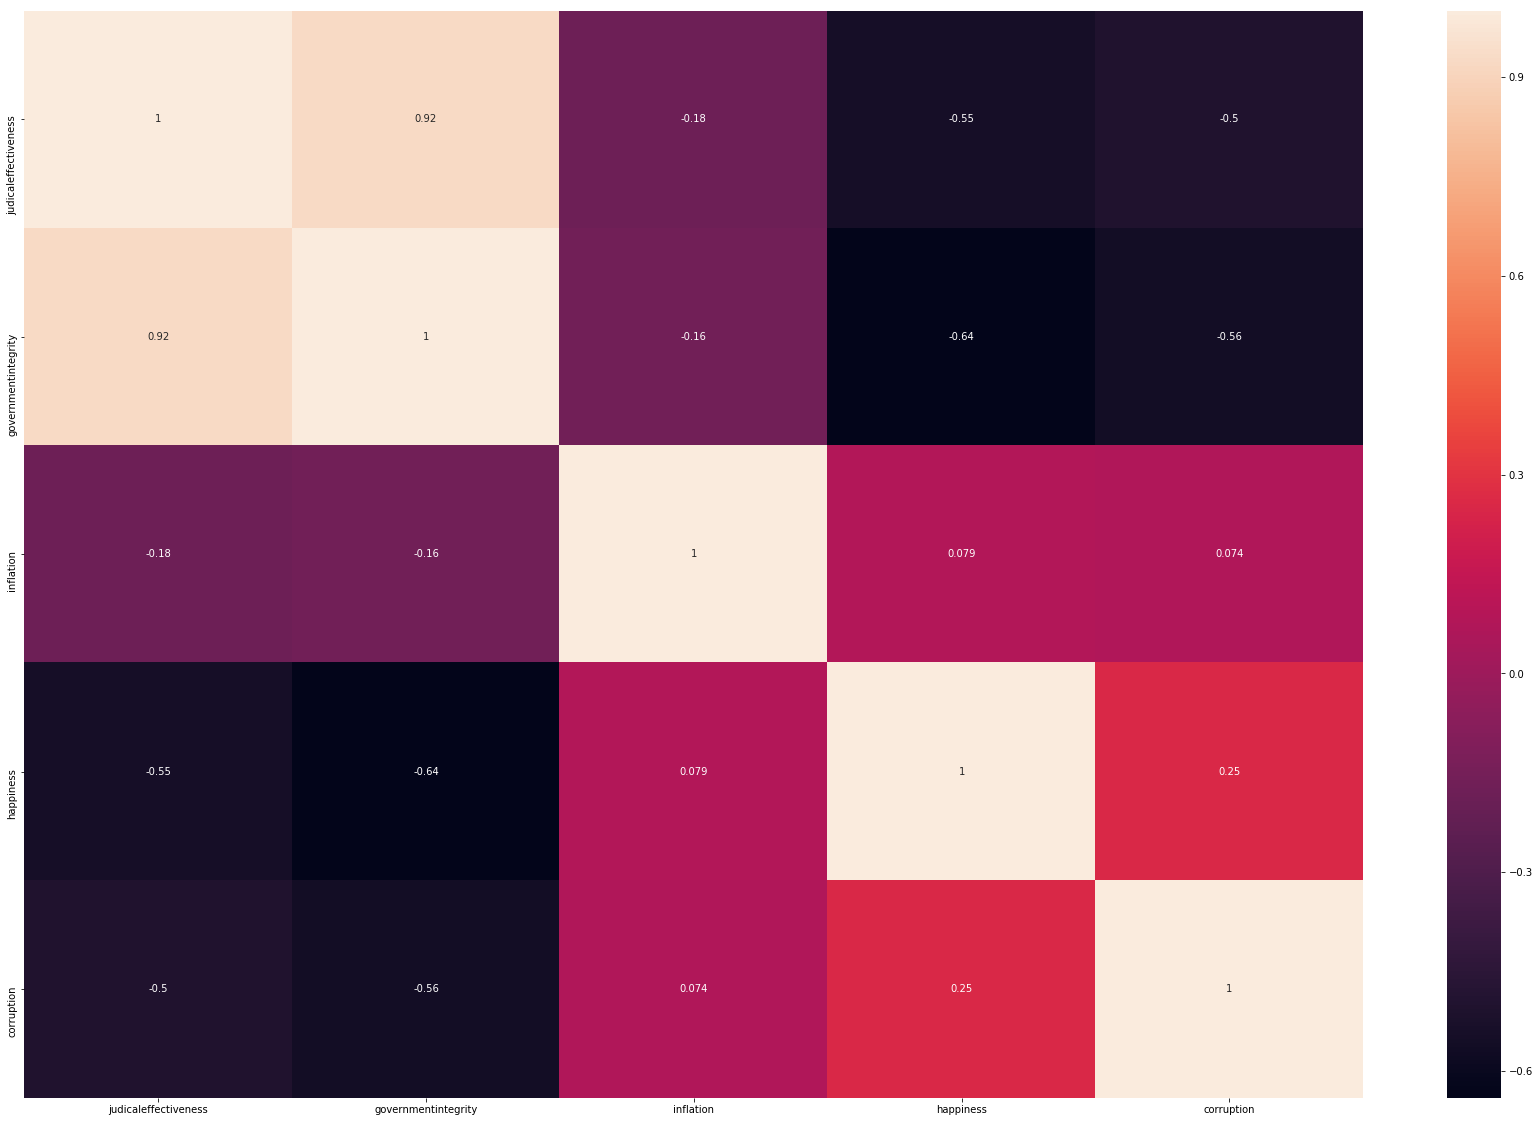

In [27]:
gov_corr = df_analysis[['countryname','judicaleffectiveness','governmentintegrity','inflation','happiness','corruption']]

gov_corr_heatmap = gov_corr.corr()


#Plotting of heatmap to determine which variables correlate the most with happiness
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(gov_corr_heatmap,xticklabels=gov_corr_heatmap.columns,yticklabels=gov_corr_heatmap.columns, annot=True)

### Insight 3: The impact of Healthylife expectancy, LogofGDP per capita, and Social support correlate to Happiness.

Happiness is highly positively correlated with Healthylife expectancy,LogofGDP per capita, and Social support.

This proves the hypothesis of people are generally more happy when the country has a higher GDP per capita.

People are also generally more happy when they know that they are able to live a longer life and when their family, friends, and  colleagues provide them with support.

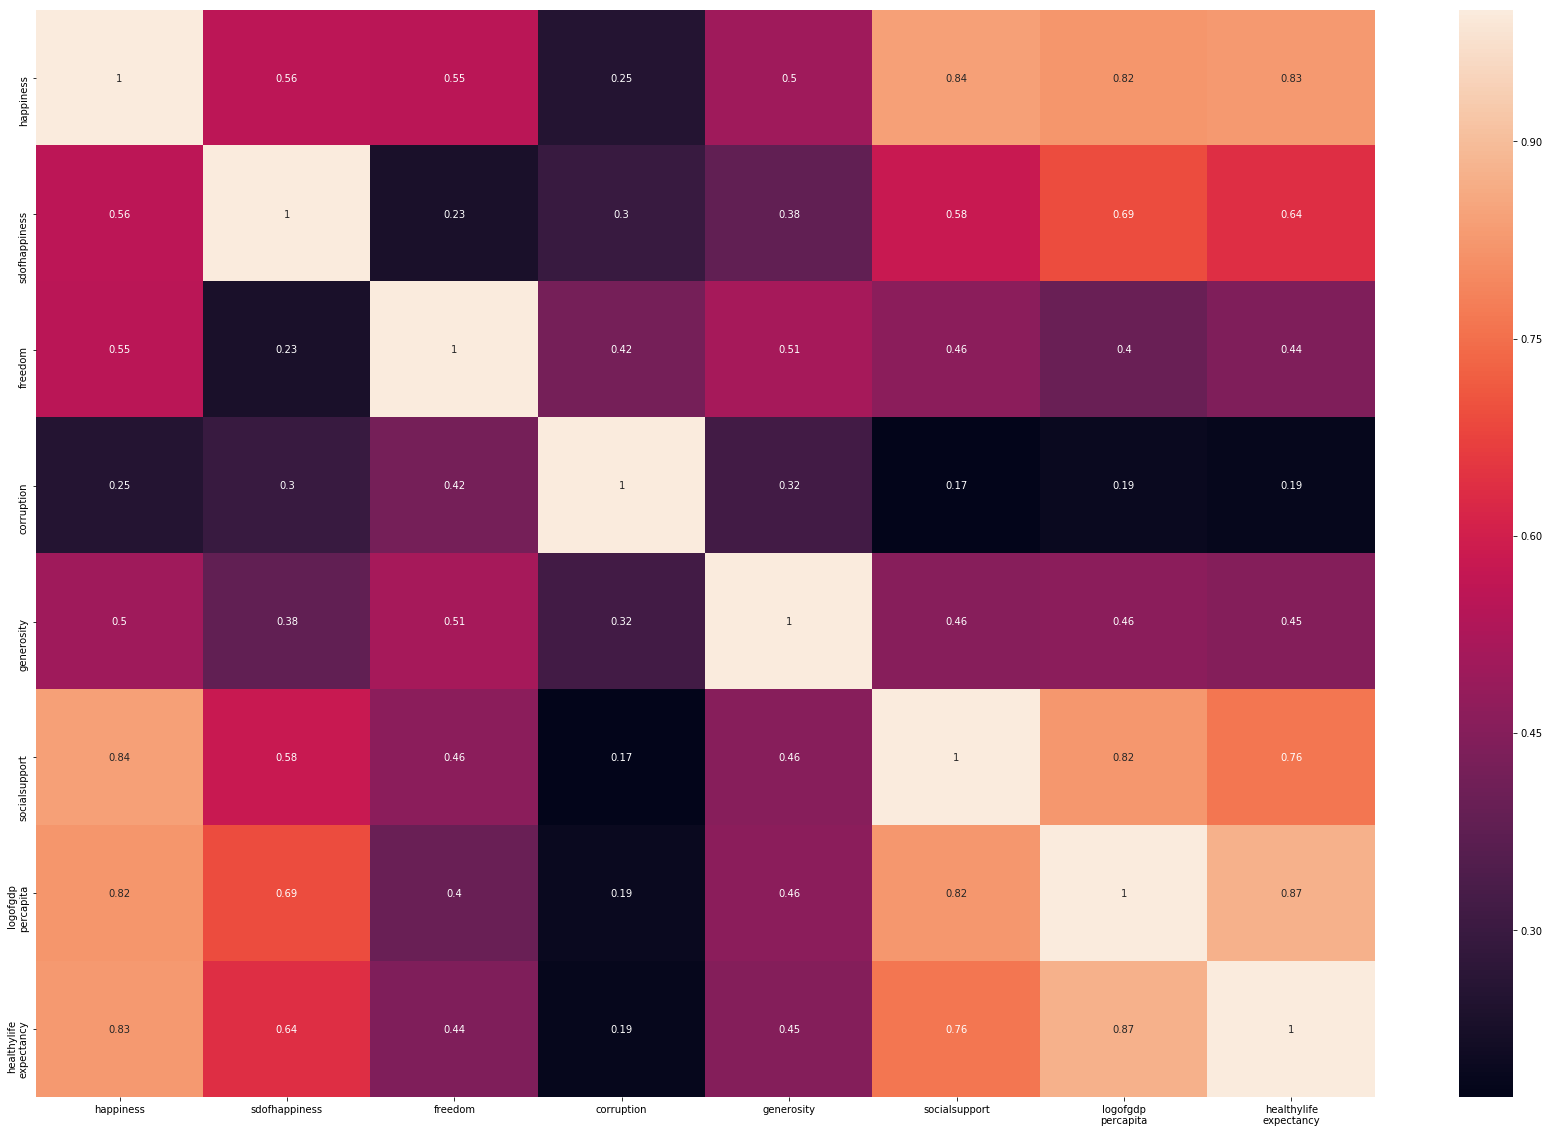

In [28]:
df_corr = df_analysis.drop(columns=['countryname','worldrank','judicaleffectiveness','governmentintegrity',
    'businessfreedom', 'laborfreedom', 'monetaryfreedom', 'tradefreedom' ,'investmentfreedom', 'financialfreedom',
    'gdpgrowthrate','5yeargdpgrowthrate', 'gdppercapitappp', 'inflation'])

df_corr_heatmap = df_corr.corr()


#Plotting of heatmap to determine which variables correlate the most with happiness
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(df_corr_heatmap,xticklabels=df_corr.columns,yticklabels=df_corr.columns, annot=True)

In [29]:
df_corr_heatmap.head()

,happiness,sdofhappiness,freedom,corruption,generosity,socialsupport,logofgdp percapita,healthylife expectancy
happiness,1.000000,0.555905,0.551027,0.251393,0.502000,0.840161,0.821200,0.825935
sdofhappiness,0.555905,1.000000,0.229044,0.298502,0.381491,0.582382,0.690252,0.636013
freedom,0.551027,0.229044,1.000000,0.420953,0.512599,0.462306,0.396369,0.440037
corruption,0.251393,0.298502,0.420953,1.000000,0.315009,0.172665,0.193386,0.185429
generosity,0.502000,0.381491,0.512599,0.315009,1.000000,0.455147,0.462690,0.448949


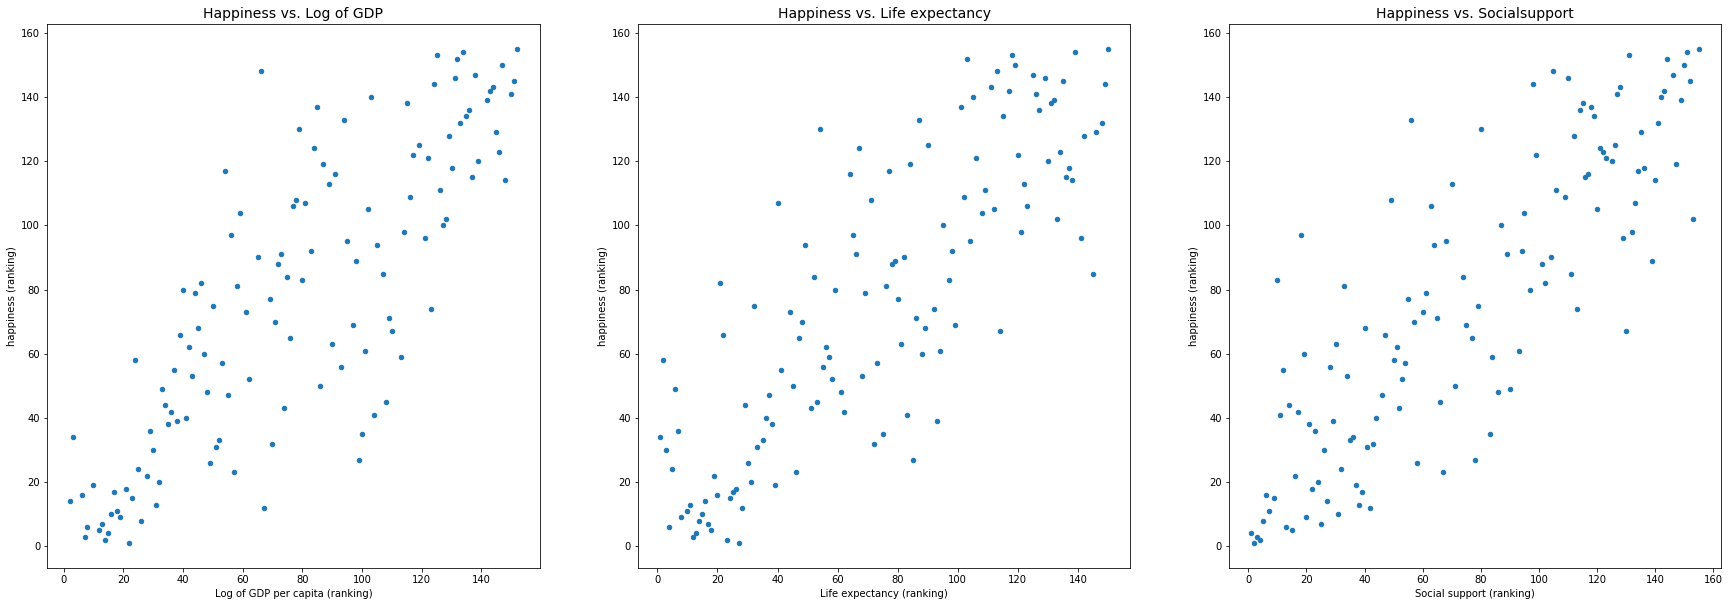

In [30]:
df_corr.dropna(inplace=True)


#Plotting of Scatterplot to determine linearity between be
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

df_corr.plot(kind='scatter', x='logofgdp\npercapita', y='happiness', ax=ax)
df_corr.plot(kind='scatter', x='healthylife\nexpectancy', y='happiness', ax=ax1)
df_corr.plot(kind='scatter', x='socialsupport', y='happiness', ax=ax2)



ax.set_title("Happiness vs. Log of GDP", fontsize=14)
ax1.set_title("Happiness vs. Life expectancy", fontsize=14)
ax2.set_title("Happiness vs. Socialsupport", fontsize=14)


ax.set_xlabel('Log of GDP per capita (ranking)')
ax1.set_xlabel('Life expectancy (ranking)')
ax2.set_xlabel('Social support (ranking)')


ax.set_ylabel('happiness (ranking)')
ax1.set_ylabel('happiness (ranking)')
ax2.set_ylabel('happiness (ranking)')



plt.show()

In [31]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_corr[['logofgdp\npercapita']]
y = df_corr['happiness']

X1 = df_corr[['healthylife\nexpectancy']]

X2 = df_corr[['socialsupport']]

# Create the Model
#
model = sm.OLS(y,X)
model1 = sm.OLS(y,X1)
model2 = sm.OLS(y,X2)

# Train the model on the training set
#
results = model.fit()
results1=model1.fit()
results2=model2.fit()

# Print the summary results
#
results.summary()
results1.summary()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1400.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           8.83e-71
Time:                        23:33:18   Log-Likelihood:                -602.61
No. Observations:                 129   AIC:                             1207.
Df Residuals:                     128   BIC:                             1210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
socialsupport     0.9697      0.026     37.415      0.000       0.918       1.021
==============================================================================
Omnibus:                        5.286   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.884
Skew:                           0.374   Prob(JB):                       0.0870
Kurtosis:                       3.591   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
results.fittedvalues.head()

df_corr['fitted_happinessGDP'] = results.fittedvalues
df_corr['fitted_happinessLIFE'] = results1.fittedvalues
df_corr['fitted_happinessSOCIAL'] = results2.fittedvalues

In [33]:
df_corr.columns

Index(['happiness', 'sdofhappiness', 'freedom', 'corruption', 'generosity',
       'socialsupport', 'logofgdp\npercapita', 'healthylife\nexpectancy',
       'fitted_happinessGDP', 'fitted_happinessLIFE',
       'fitted_happinessSOCIAL'],
      dtype='object')

### Plot of Scatterplot and Best fit line of the top 3 variables that are most correlated to Happiness:

Data points in graphs show a linear correlation between the 3 variables and happiness.

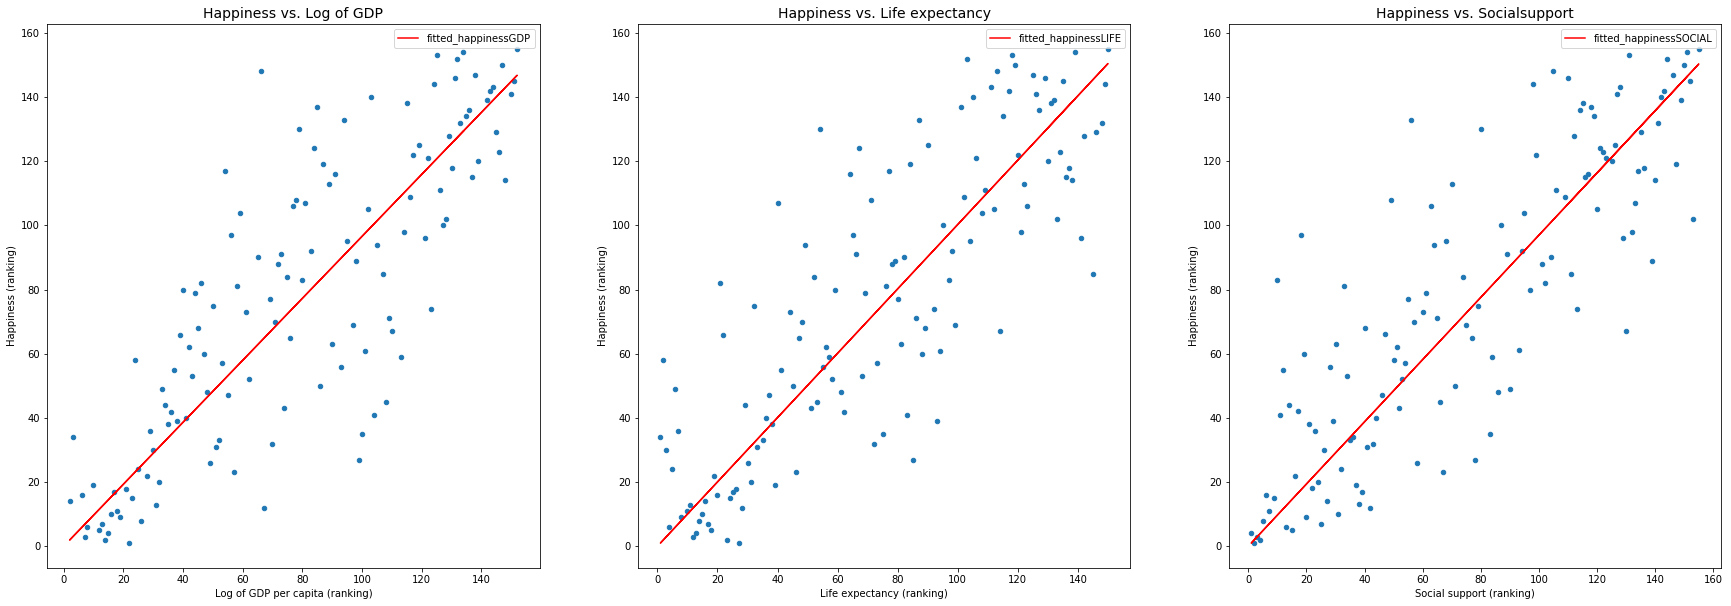

In [34]:
#Plotting of Scatterplot to determine linearity between be
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

df_corr.plot(kind='scatter', x='logofgdp\npercapita', y='happiness', ax=ax)
df_corr.plot(kind='scatter', x='healthylife\nexpectancy', y='happiness', ax=ax1)
df_corr.plot(kind='scatter', x='socialsupport', y='happiness', ax=ax2)


df_corr.plot(kind='line', x='logofgdp\npercapita', y='fitted_happinessGDP', ax=ax, color='red')
df_corr.plot(kind='line', x='healthylife\nexpectancy', y='fitted_happinessLIFE', ax=ax1, color='red')
df_corr.plot(kind='line', x='socialsupport', y='fitted_happinessSOCIAL', ax=ax2, color='red')


ax.set_title("Happiness vs. Log of GDP", fontsize=14)
ax1.set_title("Happiness vs. Life expectancy", fontsize=14)
ax2.set_title("Happiness vs. Socialsupport", fontsize=14)


ax.set_xlabel('Log of GDP per capita (ranking)')
ax1.set_xlabel('Life expectancy (ranking)')
ax2.set_xlabel('Social support (ranking)')


ax.set_ylabel('Happiness (ranking)')
ax1.set_ylabel('Happiness (ranking)')
ax2.set_ylabel('Happiness (ranking)')


plt.show()

### Notes for Instructor

Double click on this cell and remove `hidden="true"`. (Use this if you'd like your report to be a private one and not be shared with anybody)
<p style="color:red" hidden="true"><b>Please do not share the findings of this report.</b></p>